Now that we studied the Q-Learning algorithm, let’s implement it from scratch and train our Q-Learning agent in Taxi-3 environment:


*Q-Learning* **is the RL algorithm that**:

- Trains *Q-Function*, an **action-value function** that encoded, in internal memory, by a *Q-table* **that contains all the state-action pair values.**

- Given a state and action, our Q-Function **will search the Q-table for the corresponding value.**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/Q-function-2.jpg" alt="Q function"  width="100%"/>

- When the training is done,**we have an optimal Q-Function, so an optimal Q-Table.**

- And if we **have an optimal Q-function**, we
have an optimal policy, since we **know for, each state, the best action to take.**

### Import the packages

In [1]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import imageio


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/amina/ana

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/amina/ana

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/amina/ana

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/amina/ana

AttributeError: _ARRAY_API not found

### QAgent Class:
Is initialized with the environment *env* and the necessary hyper-parameters (*alpha*, *gamma*, *epsilon*, etc)

This class implements the most important steps of **Q-Learning** Algorithm:
-  Q-Table initialization
    -  Q-Table shape=(n_states * n_actions)

-  Epsilon-greedy policy as an acting policy
   - With *probability 1-ɛ* : **we do exploitation** (i.e. our agent selects the action with the highest state-action pair value).

   - With *probability ɛ*: we do **exploration** (trying a random action).

-  Greedy-policy as an updating policy
   - using Bellman equation *Q(s,a) + lr[R(s,a) + gamma * max Q(s',a') - Q(s,a)]*


In [ ]:
class QAgent:

    def __init__(self, env, alpha, gamma, max_epsilon, min_epsilon, decay_rate):
       
        self.env = env

        # table with q-values: n_states * n_actions
        self.q_table=np.zeros((env.observation_space.n, env.action_space.n))

        # hyper-parameters
        self.alpha = alpha                      # learning rate
        self.gamma = gamma                      # discount factor
        self.max_epsilon = max_epsilon          # Exploration probability at start
        self.min_epsilon = min_epsilon          # Minimum exploration probability
        self.decay_rate =  decay_rate           # Exponential decay rate for exploration prob
    

    
    # get action using epsilon greedy policy
    def get_action(self, state, epsilon):
        # Randomly generate a number between 0 and 1
        random_num = random.uniform(0, 1)
    
        # if random_num > greater than epsilon --> exploitation
        if random_num > epsilon:
           # Take the action with the highest value given a state
           action = np.argmax(self.q_table[state])
           
        # else --> exploration
        else:
           action = self.env.action_space.sample()

        return action

    def update_parameters(self, state, action, reward, next_state):
        """Update Q-values using the Bellman optimality equation"""
        # Q-learning formula
        # Update Q(s,a):= Q(s,a) + lr [R(s,a)  + gamma * max Q(s',a') - Q(s,a)]
        # Current Q(s, a)
        old_value = self.q_table[state, action]
        # Maximum Q-value for next state (greedy policy)
        next_max = np.max(self.q_table[next_state])
        # Bellman update
        new_value = old_value + self.alpha * (reward + self.gamma * next_max - old_value)
        # Update Q-table
        self.q_table[state, action] = new_value

### The training loop:
The training is based on *Temporal Difference (TD) learning* where the Q-Table is updated after each step

- For episode in the total of training episodes:

  - Reduce epsilon (since we need less and less exploration)
  - Reset the environment

  - For step in max timesteps:
    - Choose the action $a$ using epsilon greedy policy
    - Take the action ($a$) and observe the outcome state(s') and reward (r)
    - Update the Q-value Q($s$,$a$) using Bellman equation Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
    - If done, finish the episode
    - Our next state is the new state

In [4]:
def train(n_training_episodes,  env, agent):

  episode_rewards = []
  episode_penalties = []
  episode_steps = []
  for episode in tqdm(range(n_training_episodes)):

    total_rewards_ep = 0
    total_penalties_ep=0
    total_steps_ep=0

    # Reduce epsilon (because we need less and less exploration)
    epsilon = agent.min_epsilon + (agent.max_epsilon - agent.min_epsilon)*np.exp(-agent.decay_rate*episode)

    # Reset the environment
    state, info = env.reset()
    step = 0
    terminated = False
    truncated = False
    done=False

    # repeat
    while not done:
      # Choose the action At using epsilon greedy policy
      action = agent.get_action(state, epsilon)

      # Take action At and observe Rt+1 and St+1
      # Take the action (a) and observe the outcome state(s') and reward (r)
      next_state, reward, terminated, truncated, info = env.step(action)

      total_rewards_ep += reward
      total_steps_ep +=1
      if reward == -10:
            total_penalties_ep += 1

      # Update Q(s,a):= Q(s,a) + lr [R(s,a)  + gamma * max Q(s',a') - Q(s,a)]
      agent.update_parameters(state, action, reward, next_state)

      # If terminated or truncated finish the episode
      done=terminated or truncated

      if done:
        break

      # Our next state is the new state
      state = next_state

    episode_rewards.append(total_rewards_ep)
    episode_steps.append(total_steps_ep)
    episode_penalties.append(total_penalties_ep)

  return  episode_rewards,episode_steps, episode_penalties


### Hyper-Parameters

The exploration related hyper-paramters are some of the most important ones.
- We need to make sure that our agent **explores enough of the state space** to learn a good value approximation. To do that, we need to have progressive decay of the epsilon.
- If you decrease epsilon too fast (too high decay_rate), **you take the risk that your agent will be stuck**, since your agent didn't explore enough of the state space and hence can't solve the problem.

In [5]:
# Training parameters
n_training_episodes = 1000  # Total training episodes
alpha= 0.7                   # Learning rate

# Environment parameters
gamma = 0.95                 # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05            # Minimum exploration probability
decay_rate = 0.0005           # Exponential decay rate for exploration prob

# Evaluation parameters
n_eval_episodes = 100        # Total number of test episodes



### Train the Q-Agent on Taxiv3 Environment

In [8]:
env=gym.make("Taxi-v3", render_mode="rgb_array")
agent = QAgent(env, alpha=0.7, gamma=0.95, max_epsilon=1.0, min_epsilon=0.01, decay_rate=0.01)
episode_rewards,episode_steps, episode_penalties=train(n_training_episodes, env,agent)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 545.20it/s]


### Plot the training result
- episode_rewards: the cumulative rewards progression over all episodes (should be increased over time)
- episode_steps: the required step per episode (should be decreased over time)
- episode_penalties: the total penalties per episode (should be decreased over time)

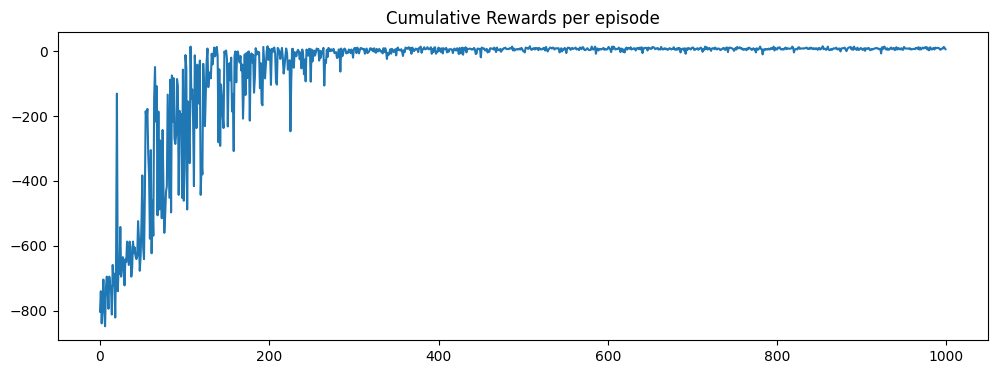

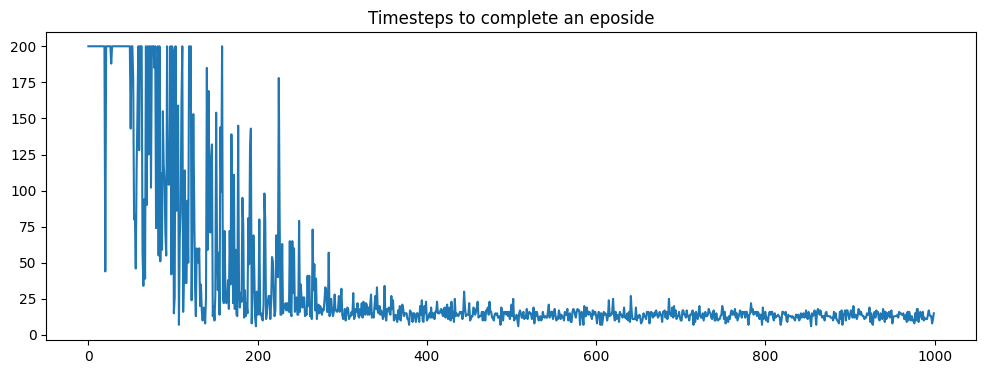

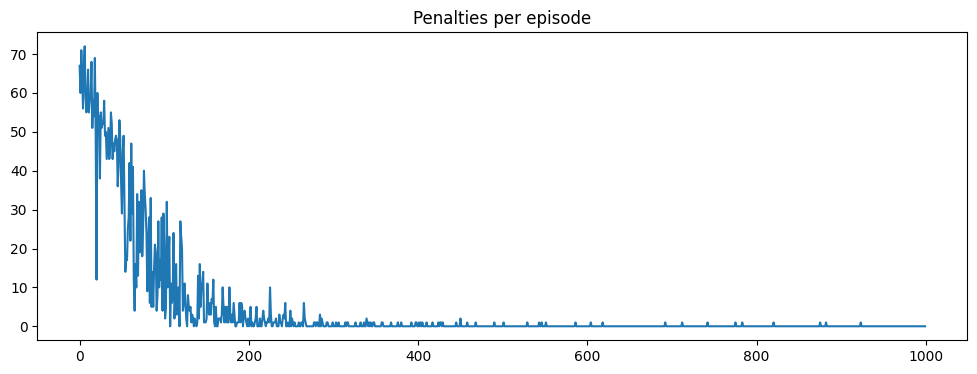

In [9]:
fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Cumulative Rewards per episode")
pd.Series(episode_rewards).plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete an eposide")
pd.Series(episode_steps).plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per episode")
pd.Series(episode_penalties).plot(kind='line')
plt.show()

### Evaluate the QAgent after training

In [10]:
def evaluate_agent(env,agent,  n_eval_episodes):
  """
  Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
  :param agent: the gent within its  evaluation environment and Qtable
  :param max_steps: Maximum number of steps per episode
  :param n_eval_episodes: Number of episode to evaluate the agent
   """
  episode_rewards = []
  episode_penalties = []
  episode_steps = []
  for episode in tqdm(range(n_eval_episodes)):

    state, info= env.reset()
    step = 0
    truncated = False
    terminated = False
    total_rewards_ep = 0
    total_penalties_ep=0
    total_steps_ep=0
    done= False

    while not done:
      # Take the action (index) that have the maximum expected future reward given that state
      # we use epsilon=0 for exploitation

      action = agent.get_action(state,0)
      next_state, reward, terminated, truncated, info = env.step(action)

      total_rewards_ep += reward
      total_steps_ep+=1

      if reward == -10:
            total_penalties_ep += 1

      done=terminated or truncated

      if done:
        break

      state = next_state

    episode_rewards.append(total_rewards_ep)
    episode_steps.append(total_steps_ep)
    episode_penalties.append(total_penalties_ep)

  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward, episode_rewards,episode_steps, episode_penalties

In [11]:
mean_reward, std_reward,episode_rewards,episode_steps, episode_penalties=evaluate_agent(env,agent, 1000)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

100%|██████████| 1000/1000 [00:00<00:00, 1237.98it/s]

Mean_reward=1.31 +/- 36.69


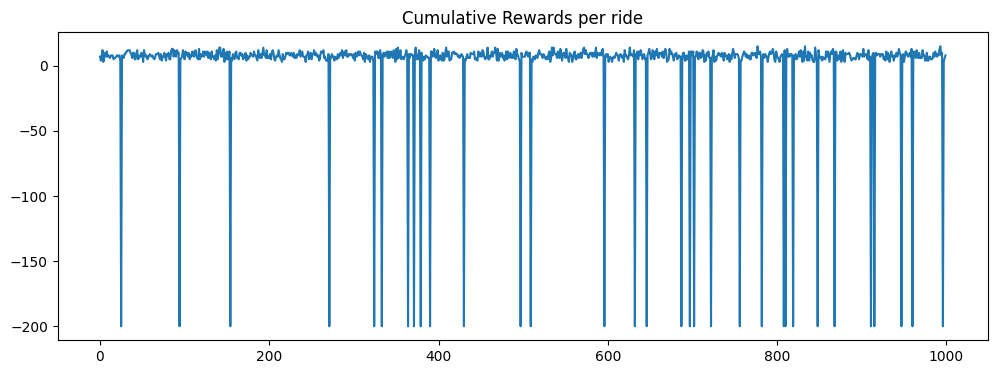

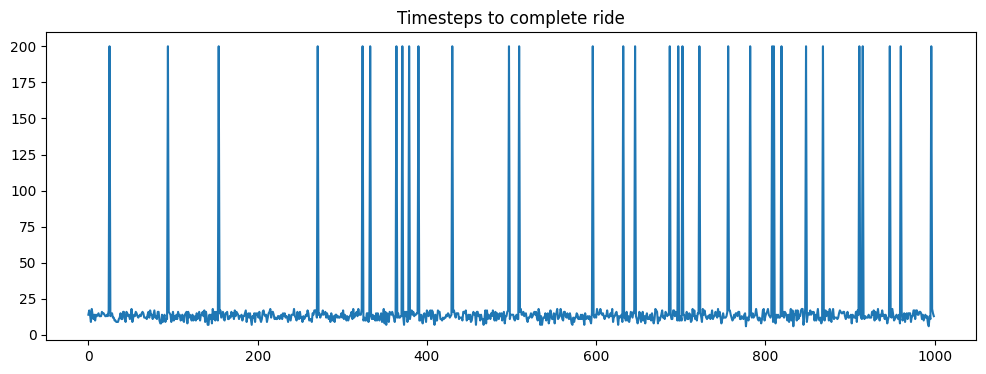

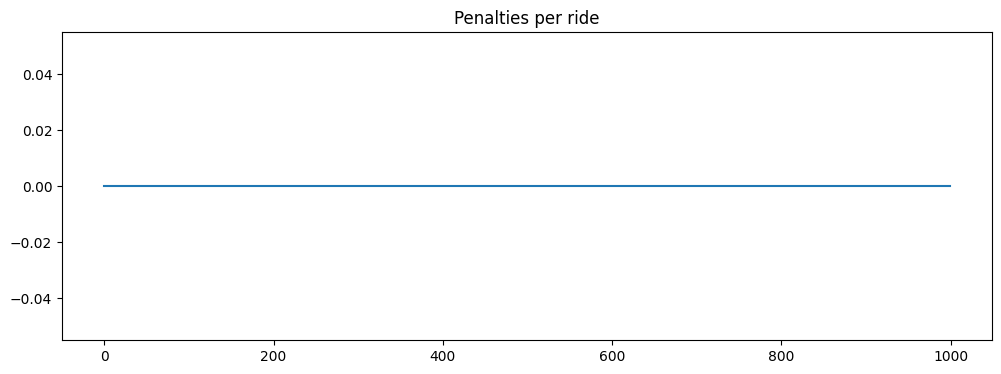

In [12]:
fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Cumulative Rewards per ride")
pd.Series(episode_rewards).plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete ride")
pd.Series(episode_steps).plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")
pd.Series(episode_penalties).plot(kind='line')
plt.show()

### Record a simulation as a video

In [13]:
def record_video(env, agent, out_directory, fps=1):
  """
  Generate a replay video of the agent
  :param env
  :param agent:  agent within its Qtable
  :param out_directory
  :param fps: how many frame per seconds (with taxi-v3 and frozenlake-v1 we use 1)
  """
  images = []
  terminated = False
  truncated = False
  state, info = env.reset(seed=random.randint(0,500))
  img = env.render()
  images.append(img)
  while not terminated or truncated:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(agent.q_table[state][:])
    state, reward, terminated, truncated, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render()
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

In [ ]:

from base64 import b64encode
from IPython.display import HTML

# generate the video
video_path = "./replay.mp4"
record_video(env, agent, video_path, 1)

# Show video
mp4 = open(video_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width=400 controls>      <source src="%s" type="video/mp4"></video>""" % data_url)